Alumno : Bruno Nicolas Rodriguez ; Registro: 879381

# **EJERCICIO 1**

In [1]:
!pip install bcraapi
import requests
from datetime import datetime, timedelta
import pandas as pd
import urllib3
import json

In [2]:
## obtenemos fecha de hoy
fecha_hoy =  datetime.today()
#fecha_format = "2025-04-09"
#formateamos la fecha en YYYY-MM-DD
fecha_format = fecha_hoy.strftime('%Y-%m-%d')
print(fecha_format)

fecha_inicio = fecha_hoy - timedelta(days=10)
fecha_inicio_format = fecha_inicio.strftime('%Y-%m-%d')
#fecha_inicio_format = "2025-04-07"
print(fecha_inicio_format)

2025-09-15
2025-09-05


In [3]:
url_bcra = f"https://api.bcra.gob.ar/estadisticas/v3.0/monetarias/?desde={fecha_inicio_format}&hasta={fecha_format}"
print(url_bcra)

https://api.bcra.gob.ar/estadisticas/v3.0/monetarias/?desde=2025-09-05&hasta=2025-09-15


In [4]:
variables = requests.get(url_bcra, verify=False)
variables.status_code
print(variables.status_code) #Corroboramos que este OK el estatus de conexion OK =200

200


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.bcra.gob.ar'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [5]:
response = variables.json() #utilizamos Json para poder leer tipo diccionario (abierto / categorizado)
print(response)


{'status': 200, 'results': [{'idVariable': 1, 'descripcion': 'Reservas Internacionales del BCRA\xa0(en millones de dólares - cifras provisorias sujetas a cambio de valuación)', 'categoria': 'Principales Variables', 'fecha': '2025-09-10', 'valor': 40404.0}, {'idVariable': 4, 'descripcion': 'Tipo de Cambio Minorista ($ por USD) Comunicación B 9791 - Promedio vendedor', 'categoria': 'Principales Variables', 'fecha': '2025-09-12', 'valor': 1467.42}, {'idVariable': 5, 'descripcion': 'Tipo de Cambio Mayorista ($ por USD) Comunicación A 3500\xa0- Referencia', 'categoria': 'Principales Variables', 'fecha': '2025-09-12', 'valor': 1447.17}, {'idVariable': 7, 'descripcion': 'BADLAR en pesos de bancos privados (en % n.a.)', 'categoria': 'Principales Variables', 'fecha': '2025-09-11', 'valor': 50.9375}, {'idVariable': 8, 'descripcion': 'TM20 en pesos de bancos privados\xa0(en % n.a.)', 'categoria': 'Principales Variables', 'fecha': '2025-09-11', 'valor': 51.875}, {'idVariable': 10, 'descripcion': '

In [6]:
response.keys() #consultamos la info principal que posee

dict_keys(['status', 'results'])

In [7]:
response2 = response.get("results") # nos quedamos solo con Resultados

In [9]:
dat_frame = pd.DataFrame(response2) #creamos un data frame con la info de resultados.

In [10]:
dat_frame2 = dat_frame.dropna() # reemplazamos los valores NAN por cero
filfech = dat_frame.loc[dat_frame["fecha"] >= fecha_inicio_format] # nos quedamos con la  informacion a partir de la fecha que estamos buscando

In [11]:
Dat_bcra = filfech.pivot_table( index = "fecha", columns = "descripcion" , values = "valor" ) # realizamos una tabla pivot con las filas trayendo la fecha y las columnas con las descripciones de variables.
Dat_bcra.fillna(0)

descripcion,A plazo (incluye inversiones y excluye CEDROS) (en millones de pesos),"BADLAR de bancos privados,TEA (en %)","BADLAR de bancos privados,TNA (en %)",BADLAR en pesos de bancos privados (en % e.a.),BADLAR en pesos de bancos privados (en % n.a.),"BADLAR total bancos, TNA (en %)",Base monetaria - Total (en millones de pesos),Billetes y monedas en poder del público (en millones de pesos),CER (Base 2.2.2002=1),Circulación monetaria (en millones de pesos),...,Variación diaria de cuasimonedas (en millones de $),Variación diaria de cuentas corrientes en pesos en el BCRA (en millones de $),Variación diaria de la base monetaria (en millones de $),Variación diaria de la base monetaria más variación diaria de cuasimonedas (en millones de $),Variación diaria de reservas internacionales por compra de divisas (en millones de USD),Variación diaria de reservas internacionales por efectivo mínimo (en millones de USD),Variación diaria de reservas internacionales por operaciones con organismos internacionales (en millones de USD),Variación diaria de reservas internacionales por otras operaciones del sector público (en millones de USD),Variación diaria de reservas internacionales por otras operaciones no incluidas en otros rubros (en millones de USD),"Índice para Contratos de Locación (ICL-Ley 27.551, con dos decimales, base 30.6.20=1)"
fecha,,,,,,,,,,,,,,,,,,,,,
2025-09-09,0.0,0.0000,0.0000,0.0,0.0000,0.0000,0.0,0.0,0.000,0.0,...,0.0,-836584.0,-857092.0,-857092.0,0.0,22.5415,0.0,-26.7456,-35.8654,0.00
2025-09-10,78012228.0,0.0000,0.0000,0.0,0.0000,0.0000,41474053.0,21614368.0,0.000,23597645.0,...,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0000,0.00
2025-09-11,0.0,64.5968,50.9375,64.6,50.9375,50.3125,0.0,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0000,0.00
2025-09-12,0.0,0.0000,0.0000,0.0,0.0000,0.0000,0.0,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0000,0.00
2025-09-14,0.0,0.0000,0.0000,0.0,0.0000,0.0000,0.0,0.0,627.465,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0000,27.38


# **Ejercicio 2**

2.a) no es adecuado utilzar el PBI PC para realizar una comparacion entre paises ya que solo nos proporciona una parte de la informacion del pais, no conocemos como esta distribuido este PBI en la poblacion, puede haber una concentracion de PBI en una parte muy chica de la sociedad probocando que haya una gran desigualdad.

In [ ]:
import requests
import pandas as pd
!pip install world-bank-data
import world_bank_data as wb
import matplotlib.pyplot as plt

In [ ]:
url_paises = "https://api.worldbank.org/v2/country/all?format=json&per_page=20000"

In [ ]:
res = requests.get(url_paises)
paises = pd.DataFrame(res.json()[1])
paises.head(10)

,id,iso2Code,name,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,latitude
0,ABW,AW,Aruba,"{'id': 'LCN', 'iso2code': 'ZJ', 'value': 'Lati...","{'id': '', 'iso2code': '', 'value': ''}","{'id': 'HIC', 'iso2code': 'XD', 'value': 'High...","{'id': 'LNX', 'iso2code': 'XX', 'value': 'Not ...",Oranjestad,-70.0167,12.5167
1,AFE,ZH,Africa Eastern and Southern,"{'id': 'NA', 'iso2code': 'NA', 'value': 'Aggre...","{'id': '', 'iso2code': '', 'value': ''}","{'id': 'NA', 'iso2code': 'NA', 'value': 'Aggre...","{'id': '', 'iso2code': '', 'value': 'Aggregates'}",,,
2,AFG,AF,Afghanistan,"{'id': 'SAS', 'iso2code': '8S', 'value': 'Sout...","{'id': 'SAS', 'iso2code': '8S', 'value': 'Sout...","{'id': 'LIC', 'iso2code': 'XM', 'value': 'Low ...","{'id': 'IDX', 'iso2code': 'XI', 'value': 'IDA'}",Kabul,69.1761,34.5228
3,AFR,A9,Africa,"{'id': 'NA', 'iso2code': 'NA', 'value': 'Aggre...","{'id': '', 'iso2code': '', 'value': ''}","{'id': 'NA', 'iso2code': 'NA', 'value': 'Aggre...","{'id': '', 'iso2code': '', 'value': 'Aggregates'}",,,
4,AFW,ZI,Africa Western and Central,"{'id': 'NA', 'iso2code': 'NA', 'value': 'Aggre...","{'id': '', 'iso2code': '', 'value': ''}","{'id': 'NA', 'iso2code': 'NA', 'value': 'Aggre...","{'id': '', 'iso2code': '', 'value': 'Aggregates'}",,,
5,AGO,AO,Angola,"{'id': 'SSF', 'iso2code': 'ZG', 'value': 'Sub-...","{'id': 'SSA', 'iso2code': 'ZF', 'value': 'Sub-...","{'id': 'LMC', 'iso2code': 'XN', 'value': 'Lowe...","{'id': 'IBD', 'iso2code': 'XF', 'value': 'IBRD'}",Luanda,13.242,-8.81155
6,ALB,AL,Albania,"{'id': 'ECS', 'iso2code': 'Z7', 'value': 'Euro...","{'id': 'ECA', 'iso2code': '7E', 'value': 'Euro...","{'id': 'UMC', 'iso2code': 'XT', 'value': 'Uppe...","{'id': 'IBD', 'iso2code': 'XF', 'value': 'IBRD'}",Tirane,19.8172,41.3317
7,AND,AD,Andorra,"{'id': 'ECS', 'iso2code': 'Z7', 'value': 'Euro...","{'id': '', 'iso2code': '', 'value': ''}","{'id': 'HIC', 'iso2code': 'XD', 'value': 'High...","{'id': 'LNX', 'iso2code': 'XX', 'value': 'Not ...",Andorra la Vella,1.5218,42.5075
8,ARB,1A,Arab World,"{'id': 'NA', 'iso2code': 'NA', 'value': 'Aggre...","{'id': '', 'iso2code': '', 'value': ''}","{'id': 'NA', 'iso2code': 'NA', 'value': 'Aggre...","{'id': '', 'iso2code': '', 'value': 'Aggregates'}",,,
9,ARE,AE,United Arab Emirates,"{'id': 'MEA', 'iso2code': 'ZQ', 'value': 'Midd...","{'id': '', 'iso2code': '', 'value': ''}","{'id': 'HIC', 'iso2code': 'XD', 'value': 'High...","{'id': 'LNX', 'iso2code': 'XX', 'value': 'Not ...",Abu Dhabi,54.3705,24.4764


In [ ]:
print(paises["name"])

0                                                  Aruba
1                            Africa Eastern and Southern
2                                            Afghanistan
3                                                 Africa
4                             Africa Western and Central
                             ...                        
291    Sub-Saharan Africa excluding South Africa and ...
292                                          Yemen, Rep.
293                                         South Africa
294                                               Zambia
295                                             Zimbabwe
Name: name, Length: 296, dtype: object


In [ ]:
PIB_PC2015 = "NY.GDP.PCAP.KD" ## saco la info de PIB per cápita (US$ a precios constantes de 2015)


In [ ]:
df = pd.DataFrame(wb.get_series(PIB_PC2015)).reset_index().rename(columns={PIB_PC2015: "value"})
df

,Country,Series,Year,value
0,Africa Eastern and Southern,GDP per capita (constant 2015 US$),1960,1172.316285
1,Africa Eastern and Southern,GDP per capita (constant 2015 US$),1961,1147.268217
2,Africa Eastern and Southern,GDP per capita (constant 2015 US$),1962,1204.744460
3,Africa Eastern and Southern,GDP per capita (constant 2015 US$),1963,1238.408507
4,Africa Eastern and Southern,GDP per capita (constant 2015 US$),1964,1261.077266
...,...,...,...,...
17285,Zimbabwe,GDP per capita (constant 2015 US$),2020,1224.272314
17286,Zimbabwe,GDP per capita (constant 2015 US$),2021,1305.220113
17287,Zimbabwe,GDP per capita (constant 2015 US$),2022,1361.914530
17288,Zimbabwe,GDP per capita (constant 2015 US$),2023,1410.737311


In [ ]:
countries = wb.get_countries() #saco la info de los paises para quedarme con los nombres
countries

,iso2Code,name,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,latitude
id,,,,,,,,,
ABW,AW,Aruba,Latin America & Caribbean,,High income,Not classified,Oranjestad,-70.0167,12.5167
AFE,ZH,Africa Eastern and Southern,Aggregates,,Aggregates,Aggregates,,NaN,NaN
AFG,AF,Afghanistan,South Asia,South Asia,Low income,IDA,Kabul,69.1761,34.5228
AFR,A9,Africa,Aggregates,,Aggregates,Aggregates,,NaN,NaN
AFW,ZI,Africa Western and Central,Aggregates,,Aggregates,Aggregates,,NaN,NaN
...,...,...,...,...,...,...,...,...,...
XZN,A5,Sub-Saharan Africa excluding South Africa and ...,Aggregates,,Aggregates,Aggregates,,NaN,NaN
YEM,YE,"Yemen, Rep.",Middle East & North Africa,Middle East & North Africa (excluding high inc...,Low income,IDA,Sana'a,44.2075,15.3520
ZAF,ZA,South Africa,Sub-Saharan Africa,Sub-Saharan Africa (excluding high income),Upper middle income,IBRD,Pretoria,28.1871,-25.7460


In [ ]:
countries.head(10)

,iso2Code,name,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,latitude
id,,,,,,,,,
ABW,AW,Aruba,Latin America & Caribbean,,High income,Not classified,Oranjestad,-70.0167,12.51670
AFE,ZH,Africa Eastern and Southern,Aggregates,,Aggregates,Aggregates,,NaN,NaN
AFG,AF,Afghanistan,South Asia,South Asia,Low income,IDA,Kabul,69.1761,34.52280
AFR,A9,Africa,Aggregates,,Aggregates,Aggregates,,NaN,NaN
AFW,ZI,Africa Western and Central,Aggregates,,Aggregates,Aggregates,,NaN,NaN
AGO,AO,Angola,Sub-Saharan Africa,Sub-Saharan Africa (excluding high income),Lower middle income,IBRD,Luanda,13.2420,-8.81155
ALB,AL,Albania,Europe & Central Asia,Europe & Central Asia (excluding high income),Upper middle income,IBRD,Tirane,19.8172,41.33170
AND,AD,Andorra,Europe & Central Asia,,High income,Not classified,Andorra la Vella,1.5218,42.50750
ARB,1A,Arab World,Aggregates,,Aggregates,Aggregates,,NaN,NaN


In [ ]:
df_join = pd.merge(df, countries, how="inner", left_on="Country", right_on="name") #matcheo la info de "df" con "countries" / el match lo hago por couuntry / name - union

In [ ]:
df_join # me trae tambien las regiones , las tengo que sacar del DataFrame

,Country,Series,Year,value,iso2Code,name,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,latitude
0,Africa Eastern and Southern,GDP per capita (constant 2015 US$),1960,1172.316285,ZH,Africa Eastern and Southern,Aggregates,,Aggregates,Aggregates,,NaN,NaN
1,Africa Eastern and Southern,GDP per capita (constant 2015 US$),1961,1147.268217,ZH,Africa Eastern and Southern,Aggregates,,Aggregates,Aggregates,,NaN,NaN
2,Africa Eastern and Southern,GDP per capita (constant 2015 US$),1962,1204.744460,ZH,Africa Eastern and Southern,Aggregates,,Aggregates,Aggregates,,NaN,NaN
3,Africa Eastern and Southern,GDP per capita (constant 2015 US$),1963,1238.408507,ZH,Africa Eastern and Southern,Aggregates,,Aggregates,Aggregates,,NaN,NaN
4,Africa Eastern and Southern,GDP per capita (constant 2015 US$),1964,1261.077266,ZH,Africa Eastern and Southern,Aggregates,,Aggregates,Aggregates,,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17155,Zimbabwe,GDP per capita (constant 2015 US$),2020,1224.272314,ZW,Zimbabwe,Sub-Saharan Africa,Sub-Saharan Africa (excluding high income),Lower middle income,Blend,Harare,31.0672,-17.8312
17156,Zimbabwe,GDP per capita (constant 2015 US$),2021,1305.220113,ZW,Zimbabwe,Sub-Saharan Africa,Sub-Saharan Africa (excluding high income),Lower middle income,Blend,Harare,31.0672,-17.8312
17157,Zimbabwe,GDP per capita (constant 2015 US$),2022,1361.914530,ZW,Zimbabwe,Sub-Saharan Africa,Sub-Saharan Africa (excluding high income),Lower middle income,Blend,Harare,31.0672,-17.8312
17158,Zimbabwe,GDP per capita (constant 2015 US$),2023,1410.737311,ZW,Zimbabwe,Sub-Saharan Africa,Sub-Saharan Africa (excluding high income),Lower middle income,Blend,Harare,31.0672,-17.8312


In [ ]:
df_join = df_join[~df_join['region'].isin(['Aggregates'])] ## el signo me saca las cosas , el .issin es un True/False que matchea por fila (si es True lo sacasa)
## me quede solo con los paises
df_join

,Country,Series,Year,value,iso2Code,name,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,latitude
3055,Afghanistan,GDP per capita (constant 2015 US$),1960,NaN,AF,Afghanistan,South Asia,South Asia,Low income,IDA,Kabul,69.1761,34.5228
3056,Afghanistan,GDP per capita (constant 2015 US$),1961,NaN,AF,Afghanistan,South Asia,South Asia,Low income,IDA,Kabul,69.1761,34.5228
3057,Afghanistan,GDP per capita (constant 2015 US$),1962,NaN,AF,Afghanistan,South Asia,South Asia,Low income,IDA,Kabul,69.1761,34.5228
3058,Afghanistan,GDP per capita (constant 2015 US$),1963,NaN,AF,Afghanistan,South Asia,South Asia,Low income,IDA,Kabul,69.1761,34.5228
3059,Afghanistan,GDP per capita (constant 2015 US$),1964,NaN,AF,Afghanistan,South Asia,South Asia,Low income,IDA,Kabul,69.1761,34.5228
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17155,Zimbabwe,GDP per capita (constant 2015 US$),2020,1224.272314,ZW,Zimbabwe,Sub-Saharan Africa,Sub-Saharan Africa (excluding high income),Lower middle income,Blend,Harare,31.0672,-17.8312
17156,Zimbabwe,GDP per capita (constant 2015 US$),2021,1305.220113,ZW,Zimbabwe,Sub-Saharan Africa,Sub-Saharan Africa (excluding high income),Lower middle income,Blend,Harare,31.0672,-17.8312
17157,Zimbabwe,GDP per capita (constant 2015 US$),2022,1361.914530,ZW,Zimbabwe,Sub-Saharan Africa,Sub-Saharan Africa (excluding high income),Lower middle income,Blend,Harare,31.0672,-17.8312
17158,Zimbabwe,GDP per capita (constant 2015 US$),2023,1410.737311,ZW,Zimbabwe,Sub-Saharan Africa,Sub-Saharan Africa (excluding high income),Lower middle income,Blend,Harare,31.0672,-17.8312


In [ ]:
## Respuesta punto 2b)

In [ ]:
#Me quedo con el año 1990
top1990 = df_join[df_join["Year"]=="1990"]
top1990 = top1990.sort_values(by="value", ascending=False)
top1990.head(10)

,Country,Series,Year,value,iso2Code,name,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,latitude
11535,Monaco,GDP per capita (constant 2015 US$),1990,105878.372767,MC,Monaco,Europe & Central Asia,,High income,Not classified,Monaco,7.41891,43.73250
4450,Bermuda,GDP per capita (constant 2015 US$),1990,89089.734642,BM,Bermuda,North America,,High income,Not classified,Hamilton,-64.70600,32.32930
15305,Switzerland,GDP per capita (constant 2015 US$),1990,70063.851690,CH,Switzerland,Europe & Central Asia,,High income,Not classified,Bern,7.44821,46.94800
16345,United Arab Emirates,GDP per capita (constant 2015 US$),1990,66979.155911,AE,United Arab Emirates,Middle East & North Africa,,High income,Not classified,Abu Dhabi,54.37050,24.47640
10625,Luxembourg,GDP per capita (constant 2015 US$),1990,66027.075801,LU,Luxembourg,Europe & Central Asia,,High income,Not classified,Luxembourg,6.12960,49.61000
12640,Norway,GDP per capita (constant 2015 US$),1990,49937.455776,NO,Norway,Europe & Central Asia,,High income,Not classified,Oslo,10.73870,59.91380
4905,Brunei Darussalam,GDP per capita (constant 2015 US$),1990,44179.827691,BN,Brunei Darussalam,East Asia & Pacific,,High income,Not classified,Bandar Seri Begawan,114.94600,4.94199
13420,Qatar,GDP per capita (constant 2015 US$),1990,40125.445032,QA,Qatar,Middle East & North Africa,,High income,Not classified,Doha,51.50820,25.29480
6530,Denmark,GDP per capita (constant 2015 US$),1990,39306.793916,DK,Denmark,Europe & Central Asia,,High income,Not classified,Copenhagen,12.56810,55.67630
16475,United States,GDP per capita (constant 2015 US$),1990,39200.065811,US,United States,North America,,High income,Not classified,Washington D.C.,-77.03200,38.88950


In [ ]:
#Me quedo con el año 2010
top2010 = df_join[df_join["Year"]=="2010"]
top2010 = top2010.sort_values(by="value", ascending=False)
top2010.head(10)

,Country,Series,Year,value,iso2Code,name,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,latitude
11555,Monaco,GDP per capita (constant 2015 US$),2010,141814.786642,MC,Monaco,Europe & Central Asia,,High income,Not classified,Monaco,7.41891,43.7325
4470,Bermuda,GDP per capita (constant 2015 US$),2010,118382.908991,BM,Bermuda,North America,,High income,Not classified,Hamilton,-64.70600,32.3293
10645,Luxembourg,GDP per capita (constant 2015 US$),2010,106544.057242,LU,Luxembourg,Europe & Central Asia,,High income,Not classified,Luxembourg,6.12960,49.6100
15325,Switzerland,GDP per capita (constant 2015 US$),2010,81315.422865,CH,Switzerland,Europe & Central Asia,,High income,Not classified,Bern,7.44821,46.9480
5445,Cayman Islands,GDP per capita (constant 2015 US$),2010,79483.097281,KY,Cayman Islands,Latin America & Caribbean,,High income,Not classified,George Town,-81.38570,19.3022
10710,"Macao SAR, China",GDP per capita (constant 2015 US$),2010,74158.832915,MO,"Macao SAR, China",East Asia & Pacific,,High income,Not classified,,113.55000,22.1667
12660,Norway,GDP per capita (constant 2015 US$),2010,72804.395620,NO,Norway,Europe & Central Asia,,High income,Not classified,Oslo,10.73870,59.9138
13440,Qatar,GDP per capita (constant 2015 US$),2010,72333.984862,QA,Qatar,Middle East & North Africa,,High income,Not classified,Doha,51.50820,25.2948
9215,Isle of Man,GDP per capita (constant 2015 US$),2010,70747.841759,IM,Isle of Man,Europe & Central Asia,,High income,Not classified,Douglas,-4.47928,54.1509
5640,Channel Islands,GDP per capita (constant 2015 US$),2010,64727.433776,JG,Channel Islands,Europe & Central Asia,,High income,Not classified,,NaN,NaN


In [ ]:
## Respuesta punto 2c)

In [ ]:
#Me quedo con los años entre 2000 y 2010
decada = df_join[(df_join["Year"]>="2000") & (df_join["Year"]<="2010")]
decada

,Country,Series,Year,value,iso2Code,name,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,latitude
3095,Afghanistan,GDP per capita (constant 2015 US$),2000,308.318270,AF,Afghanistan,South Asia,South Asia,Low income,IDA,Kabul,69.1761,34.5228
3096,Afghanistan,GDP per capita (constant 2015 US$),2001,277.118051,AF,Afghanistan,South Asia,South Asia,Low income,IDA,Kabul,69.1761,34.5228
3097,Afghanistan,GDP per capita (constant 2015 US$),2002,338.139974,AF,Afghanistan,South Asia,South Asia,Low income,IDA,Kabul,69.1761,34.5228
3098,Afghanistan,GDP per capita (constant 2015 US$),2003,346.071627,AF,Afghanistan,South Asia,South Asia,Low income,IDA,Kabul,69.1761,34.5228
3099,Afghanistan,GDP per capita (constant 2015 US$),2004,338.637274,AF,Afghanistan,South Asia,South Asia,Low income,IDA,Kabul,69.1761,34.5228
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17141,Zimbabwe,GDP per capita (constant 2015 US$),2006,1032.701264,ZW,Zimbabwe,Sub-Saharan Africa,Sub-Saharan Africa (excluding high income),Lower middle income,Blend,Harare,31.0672,-17.8312
17142,Zimbabwe,GDP per capita (constant 2015 US$),2007,981.948498,ZW,Zimbabwe,Sub-Saharan Africa,Sub-Saharan Africa (excluding high income),Lower middle income,Blend,Harare,31.0672,-17.8312
17143,Zimbabwe,GDP per capita (constant 2015 US$),2008,798.773288,ZW,Zimbabwe,Sub-Saharan Africa,Sub-Saharan Africa (excluding high income),Lower middle income,Blend,Harare,31.0672,-17.8312
17144,Zimbabwe,GDP per capita (constant 2015 US$),2009,882.279748,ZW,Zimbabwe,Sub-Saharan Africa,Sub-Saharan Africa (excluding high income),Lower middle income,Blend,Harare,31.0672,-17.8312


In [ ]:
##Agrupo por paises y calculo el promedio

In [ ]:
Decada_agrup = decada.groupby("Country")["value"].mean()
Decada_agrup_high = Decada_agrup.sort_values(ascending=False)
print('los 5 paises con mayor crecimiento son: ')
Decada_agrup_high.head(5)

los 5 paises con mayor crecimiento son: 


,value
Country,
Monaco,136892.463838
Bermuda,121125.087207
Luxembourg,101945.351579
Cayman Islands,89773.840543
Switzerland,77254.581642


In [ ]:
Decada_agrup = decada.groupby("Country")["value"].mean()
Decada_agrup_down = Decada_agrup.sort_values(ascending=True)
print('los 5 paises con menor crecimiento son: ')
Decada_agrup_down.head(5)

los 5 paises con menor crecimiento son: 


,value
Country,
Somalia,277.414917
Burundi,294.316360
Ethiopia,320.464391
"Congo, Dem. Rep.",341.087171
Afghanistan,381.799122


In [ ]:
## Respuesta punto 2d)

In [ ]:
best_continent = df_join[df_join["Year"]=="2023"]
best_continent = best_continent.dropna() ## saco los valores NAN
best_continent['value'] = best_continent['value'].astype(int) ## Convierto los valores en enteros
best_continentB = best_continent.groupby(["region"])["value"].mean() ## agrupo por Region y le aclaro que lo promedie
print("La region con mayor PBI es Norte america , seguido por europa y Asia central")
best_continentB.sort_values(ascending=False) # lo ordeno

La region con mayor PBI es Norte america , seguido por europa y Asia central


,value
region,
North America,73584.000000
Europe & Central Asia,31455.942308
Middle East & North Africa,17534.666667
East Asia & Pacific,15933.266667
Latin America & Caribbean,14081.666667
South Asia,3243.571429
Sub-Saharan Africa,2287.586957


In [ ]:
## Respuesta Punto 2e)

In [ ]:
#Saco la info al año 2023
top2023 = df_join[df_join["Year"]=="2023"]
top2023 = top2023.sort_values(by="value", ascending=False)

<Axes: title={'center': '2023'}, xlabel='Year', ylabel='value'>

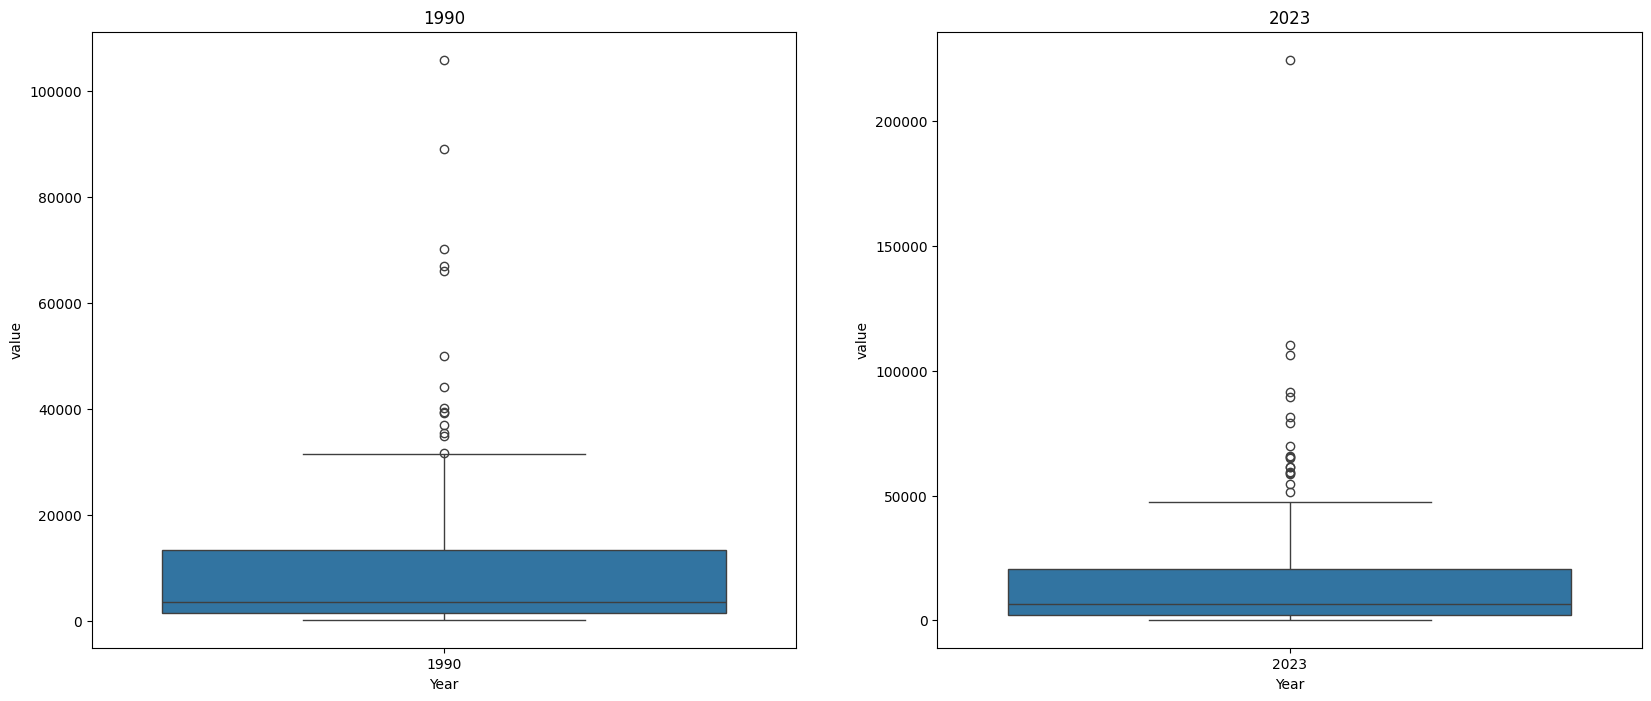

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(ncols=2,nrows=1, figsize=(20,8))
ax[0].set_title('1990')
sns.boxplot(x=top1990.Year, y=top1990.value, ax=ax[0])

import seaborn as sns
ax[1].set_title('2023')
sns.boxplot(x=top2023.Year, y=top2023.value, ax=ax[1])

In [ ]:
# calculo de percentil
setentaycinco = best_continent['value'].quantile(0.75)
veinticinco = best_continent['value'].quantile(0.25)

# calculo iqr
iqr = setentaycinco - veinticinco

# saco los bordes alto y bajo
upper = setentaycinco + (1.5 * iqr)
lower = veinticinco - (1.5 * iqr)

# Subset the dataset
outliers2023 = best_continent[(best_continent['value'] < lower) | (best_continent['value'] > upper)]
outliers2023 = outliers2023.sort_values(by="value", ascending=False)
print( ' Los 20 outlier del año 2023 son :')
outliers2023.head(20)


 Los 20 outlier del año 2023 son :


,Country,Series,Year,value,iso2Code,name,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,latitude
11568,Monaco,GDP per capita (constant 2015 US$),2023,224582,MC,Monaco,Europe & Central Asia,,High income,Not classified,Monaco,7.41891,43.73250
4483,Bermuda,GDP per capita (constant 2015 US$),2023,110409,BM,Bermuda,North America,,High income,Not classified,Hamilton,-64.70600,32.32930
10658,Luxembourg,GDP per capita (constant 2015 US$),2023,106342,LU,Luxembourg,Europe & Central Asia,,High income,Not classified,Luxembourg,6.12960,49.61000
9163,Ireland,GDP per capita (constant 2015 US$),2023,91647,IE,Ireland,Europe & Central Asia,,High income,Not classified,Dublin,-6.26749,53.34410
15338,Switzerland,GDP per capita (constant 2015 US$),2023,89555,CH,Switzerland,Europe & Central Asia,,High income,Not classified,Bern,7.44821,46.94800
5458,Cayman Islands,GDP per capita (constant 2015 US$),2023,81411,KY,Cayman Islands,Latin America & Caribbean,,High income,Not classified,George Town,-81.38570,19.30220
12673,Norway,GDP per capita (constant 2015 US$),2023,78912,NO,Norway,Europe & Central Asia,,High income,Not classified,Oslo,10.73870,59.91380
16508,United States,GDP per capita (constant 2015 US$),2023,65875,US,United States,North America,,High income,Not classified,Washington D.C.,-77.03200,38.88950
14233,Singapore,GDP per capita (constant 2015 US$),2023,65422,SG,Singapore,East Asia & Pacific,,High income,Not classified,Singapore,103.85000,1.28941
13453,Qatar,GDP per capita (constant 2015 US$),2023,65111,QA,Qatar,Middle East & North Africa,,High income,Not classified,Doha,51.50820,25.29480


In [ ]:
# calculo de percentil
setentaycinco = top1990['value'].quantile(0.75)
veinticinco = top1990['value'].quantile(0.25)

# calculo iqr
iqr = setentaycinco - veinticinco

# saco los bordes alto y bajo
upper = setentaycinco + (1.5 * iqr)
lower = veinticinco - (1.5 * iqr)

# Subset the dataset
outliers1990 = top1990[(top1990['value'] < lower) | (top1990['value'] > upper)]
outliers1990 = outliers1990.sort_values(by="value", ascending=False)
print( ' Los 20 outlier del año 1990 son :')
outliers1990.head(20)


 Los 20 outlier del año 2023 son :


,Country,Series,Year,value,iso2Code,name,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,latitude
11535,Monaco,GDP per capita (constant 2015 US$),1990,105878.372767,MC,Monaco,Europe & Central Asia,,High income,Not classified,Monaco,7.41891,43.73250
4450,Bermuda,GDP per capita (constant 2015 US$),1990,89089.734642,BM,Bermuda,North America,,High income,Not classified,Hamilton,-64.70600,32.32930
15305,Switzerland,GDP per capita (constant 2015 US$),1990,70063.851690,CH,Switzerland,Europe & Central Asia,,High income,Not classified,Bern,7.44821,46.94800
16345,United Arab Emirates,GDP per capita (constant 2015 US$),1990,66979.155911,AE,United Arab Emirates,Middle East & North Africa,,High income,Not classified,Abu Dhabi,54.37050,24.47640
10625,Luxembourg,GDP per capita (constant 2015 US$),1990,66027.075801,LU,Luxembourg,Europe & Central Asia,,High income,Not classified,Luxembourg,6.12960,49.61000
12640,Norway,GDP per capita (constant 2015 US$),1990,49937.455776,NO,Norway,Europe & Central Asia,,High income,Not classified,Oslo,10.73870,59.91380
4905,Brunei Darussalam,GDP per capita (constant 2015 US$),1990,44179.827691,BN,Brunei Darussalam,East Asia & Pacific,,High income,Not classified,Bandar Seri Begawan,114.94600,4.94199
13420,Qatar,GDP per capita (constant 2015 US$),1990,40125.445032,QA,Qatar,Middle East & North Africa,,High income,Not classified,Doha,51.50820,25.29480
6530,Denmark,GDP per capita (constant 2015 US$),1990,39306.793916,DK,Denmark,Europe & Central Asia,,High income,Not classified,Copenhagen,12.56810,55.67630
16475,United States,GDP per capita (constant 2015 US$),1990,39200.065811,US,United States,North America,,High income,Not classified,Washington D.C.,-77.03200,38.88950


Se puede concluir que tanto en 1990 como en 2023 la mayoria de los paises tienen un PBI PC bajo , la concentracion (barra azul) se encuentra en la parte baja de los valores, gracias al gráfico se puede apreciar que existen paises con valores atípicos como Monaco , Bermuda,  luxemburgo y Switzerland que se encuentran  muy por encima del resto de paises.
